### Baseline Model KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import model_functions as mf

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

In [2]:
df = pd.read_csv('../data/data_bank_account.csv')
print('data frame shape :', df.shape)
df.head()

data frame shape : (23524, 13)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


we don't need the year and the uniqueid

In [3]:
df.drop('year', axis=1, inplace=True)
df.drop('uniqueid', axis=1, inplace=True)
df.head()

,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
df.columns

Index(['country', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

informations of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   bank_account            23524 non-null  object
 2   location_type           23524 non-null  object
 3   cellphone_access        23524 non-null  object
 4   household_size          23524 non-null  int64 
 5   age_of_respondent       23524 non-null  int64 
 6   gender_of_respondent    23524 non-null  object
 7   relationship_with_head  23524 non-null  object
 8   marital_status          23524 non-null  object
 9   education_level         23524 non-null  object
 10  job_type                23524 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB


In [6]:
# categorical features
cat_features = ['country', 'bank_account', 'location_type',
                    'cellphone_access', 'gender_of_respondent',
                    'relationship_with_head', 'marital_status',
                    'education_level', 'job_type']



In [7]:
for item in cat_features:
    print(item, len(df[item].unique()), df[item].unique())

country 4 ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
bank_account 2 ['Yes' 'No']
location_type 2 ['Rural' 'Urban']
cellphone_access 2 ['Yes' 'No']
gender_of_respondent 2 ['Female' 'Male']
relationship_with_head 6 ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
marital_status 5 ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
education_level 6 ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']
job_type 10 ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']


change the data from categorical features into 0 and 1 (integer)

In [8]:
df['bank_account'] = df['bank_account'].map({'No': 0, 'Yes': 1})
df['location_type'] = df['location_type'].map({'Rural': 0, 'Urban': 1})
df.columns = df.columns.str.replace('location_type','Urban_location')
df['cellphone_access'] = df['cellphone_access'].map({'No': 0, 'Yes': 1})
df['gender_of_respondent'] = df['gender_of_respondent'].map({'Male': 0, 'Female': 1})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   bank_account            23524 non-null  int64 
 2   Urban_location          23524 non-null  int64 
 3   cellphone_access        23524 non-null  int64 
 4   household_size          23524 non-null  int64 
 5   age_of_respondent       23524 non-null  int64 
 6   gender_of_respondent    23524 non-null  int64 
 7   relationship_with_head  23524 non-null  object
 8   marital_status          23524 non-null  object
 9   education_level         23524 non-null  object
 10  job_type                23524 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [9]:
# get dummies for categorical values
df = pd.get_dummies(df, columns=['country',
                    'relationship_with_head', 'marital_status',
                    'education_level', 'job_type'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   bank_account                                     23524 non-null  int64
 1   Urban_location                                   23524 non-null  int64
 2   cellphone_access                                 23524 non-null  int64
 3   household_size                                   23524 non-null  int64
 4   age_of_respondent                                23524 non-null  int64
 5   gender_of_respondent                             23524 non-null  int64
 6   country_Kenya                                    23524 non-null  bool 
 7   country_Rwanda                                   23524 non-null  bool 
 8   country_Tanzania                                 23524 non-null  bool 
 9   country_Uganda                                   2

In [11]:
df.columns

Index(['bank_account', 'Urban_location', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent', 'country_Kenya',
       'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to answer', '

In [12]:
# Basic Model
job_type_columns = ['job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Remittance Dependent',
       'job_type_Self employed']
education_columns = ['education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training']

X = df[job_type_columns]
y = df['bank_account']

In [13]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    stratify=y)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16466, 10)
(7058, 10)
(16466,)
(7058,)


In [15]:
y_test.value_counts()

bank_account
0    6064
1     994
Name: count, dtype: int64

In [16]:
knn_model = mf.train_model(KNeighborsClassifier,
                           X_train,
                           y_train,
                           n_neighbors=15,
                           metric='euclidean',
                           weights='uniform')

In [17]:
base_knn_model = mf.model_scores_df(knn_model, X_train, X_test, y_train, y_test , 'Base_KNN_Model')
base_knn_model

,model_name,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Base_KNN_Model,0.87,0.87,0.61,0.59,0.27,0.25,0.37,0.36


In [18]:
knn_conf_matrix = confusion_matrix(y_test, knn_model.predict(X_test))
knn_conf_matrix

array([[5889,  175],
       [ 741,  253]])

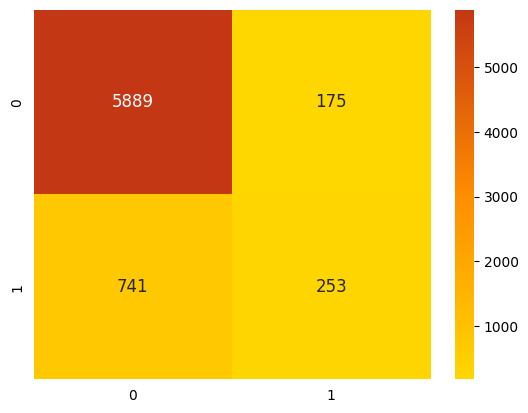

In [19]:
mf.conf_matrix_heatmap_abs(knn_conf_matrix)

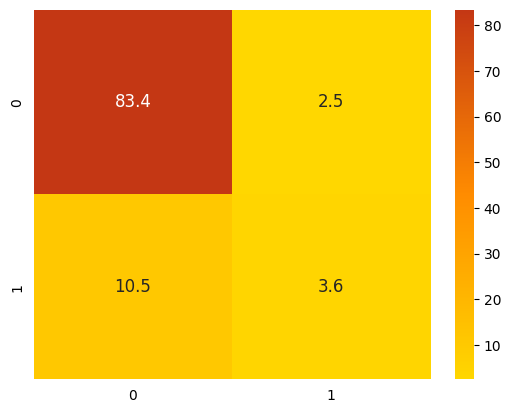

In [20]:
mf.conf_matrix_heatmap_perc(knn_conf_matrix)

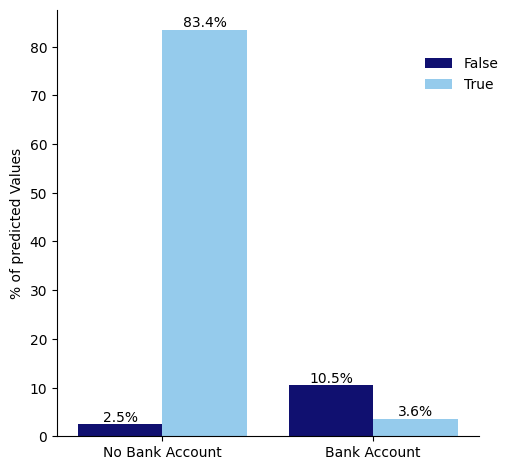

In [21]:
mf.conf_matrix_as_bar_perc(knn_conf_matrix)
plt.savefig('../plots_and_pictures/barplot_knn_basemodel.png', transparent=False)

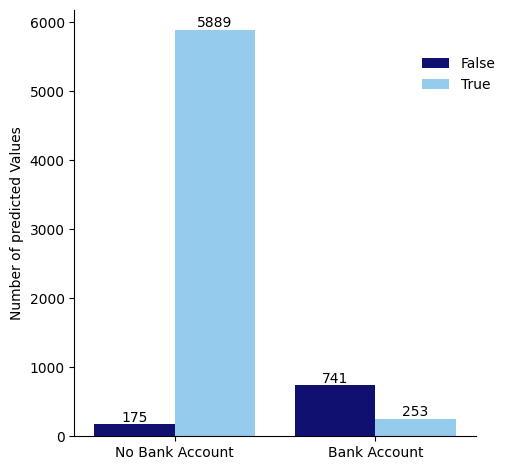

In [22]:
mf.conf_matrix_as_bar_abs(knn_conf_matrix)

In [23]:
knn_conf_matrix

array([[5889,  175],
       [ 741,  253]])

In [ ]:
test_knn_conf_matrix